In [2]:
import os
filepath = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\customer_behaviour.csv"
print(os.path.exists(filepath))  # Should print True if file exists

True


In [2]:
# Customer Behaviour Analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

filepath = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\customer_behaviour.csv"

# Loading the data
print("=" * 80)
print("Loading Customer Behaviour Analysis Data")
print("=" * 80)

df = pd.read_csv(filepath)
print("Data loaded successfully!")

# Initial Inspection
print("=" * 80)
print("Initial Data Inspection")
print("=" * 80)

print("\n1. First Few Rows:")
print("-" * 80)
display(df.head(10))

print("\n2. Data Info:")
print("-" * 80)
df.info()

print("\n3. Statistical Summary:")
print("-" * 80)
display(df.describe())

print("\n4. Column Names:")
print("-" * 80)
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

# Data Quality Assessment 
print("\n" + "=" * 80)
print("Data Quality Assessment")
print("=" * 80)

# Missing values
print("\n1. Missing Values:")
print("-" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values have been found!")

# Duplicates
print("\n2. Duplicate Rows:")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data Cleaning 
print("\n" + "=" * 80)
print("Data Cleaning")
print("=" * 80)

cleaned_df = df.copy()

# Removing duplicates
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows")
    cleaned_df = cleaned_df.drop_duplicates()

# Handling Purchase_Amount if it's a string with $ symbol
if 'Purchase_Amount' in cleaned_df.columns:
    if cleaned_df['Purchase_Amount'].dtype == 'object':
        print("Converting Purchase_Amount to numeric")
        cleaned_df['Purchase_Amount'] = (
            cleaned_df['Purchase_Amount']
            .str.replace('$', '', regex=False)
            .str.strip()
            .astype(float)
        )
        print("  - Removed $ symbols and converted to numeric")

# Converting Time_of_Purchase to datetime if present
if 'Time_of_Purchase' in cleaned_df.columns:
    try:
        print("Converting Time_of_Purchase to datetime")
        cleaned_df['Time_of_Purchase'] = pd.to_datetime(
            cleaned_df['Time_of_Purchase'],
            errors='coerce'
        )
        print("  - Converted to datetime format")
    except:
        print("  - Could not convert Time_of_Purchase to datetime")

# Handling missing values
if len(missing_df) > 0:
    print("Handling missing values")
    
    for col in missing_df.index:
        if cleaned_df[col].dtype in ['float64', 'int64']:
            cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)
            print(f"  - Filled {col} with median")
        else:
            cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)
            print(f"  - Filled {col} with mode")

print(f"Cleaned data shape: {cleaned_df.shape[0]} rows × {cleaned_df.shape[1]} columns")

# Identify Feature Types
print("\n" + "=" * 80)
print("Feature Analysis")
print("=" * 80)

numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

# Summary Stats

print(f"""
Ecommerce Customer Behaviour Analysis - Summary Report
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. Dataset Overview 
   - Total Records: {cleaned_df.shape[0]:,}
   - Total Features: {cleaned_df.shape[1]}
   - Memory Usage: {cleaned_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

2. Data Quality
   - Duplicate Rows Removed: {duplicates}
   - Missing Values Handled: {len(missing_df) > 0}

3. Feature Types 
   - Numerical Features: {len(numerical_cols)}
   - Categorical Features: {len(categorical_cols)}

4. Key Insights 
""")

# Age insights
if 'Age' in cleaned_df.columns:
    print(f"   Age Statistics:")
    print(f"   - Average Age: {cleaned_df['Age'].mean():.1f} years")
    print(f"   - Age Range: {cleaned_df['Age'].min()}-{cleaned_df['Age'].max()} years")

# Purchase insights
if 'Purchase_Amount' in cleaned_df.columns:
    print(f"\n   Purchase Amount:")
    print(f"   - Average: ${cleaned_df['Purchase_Amount'].mean():.2f}")
    print(f"   - Total Revenue: ${cleaned_df['Purchase_Amount'].sum():,.2f}")

# Frequency insights
if 'Frequency_of_Purchase' in cleaned_df.columns:
    print(f"\n   Purchase Frequency:")
    print(f"   - Average: {cleaned_df['Frequency_of_Purchase'].mean():.1f} purchases")

# Satisfaction insights
if 'Customer_Satisfaction' in cleaned_df.columns:
    print(f"\n   Customer Satisfaction:")
    print(f"   - Average Rating: {cleaned_df['Customer_Satisfaction'].mean():.2f}/10")
    satisfied = (cleaned_df['Customer_Satisfaction'] >= 7).sum()
    print(f"   - Satisfied Customers (≥7): {satisfied} ({satisfied/len(cleaned_df)*100:.1f}%)")

# Saving the cleaned dataframe
output_path = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\cleaned_customer_behaviour.csv"
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Loading Customer Behaviour Analysis Data
Data loaded successfully!
Initial Data Inspection

1. First Few Rows:
--------------------------------------------------------------------------------


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
5,82-561-4233,45,Male,Middle,Married,Master's,High,Boro Utara,Office Supplies,$487.95,...,3,NaN,Tablet,Debit Card,3/19/2024,False,False,Planned,No Preference,7
6,90-144-9193,21,Female,Middle,Divorced,High School,Middle,Liren,Furniture,$486.40,...,9,Low,Desktop,Debit Card,3/15/2024,True,False,Need-based,Express,13
7,88-661-4689,39,Male,Middle,Single,High School,Middle,Taocheng,Books,$218.06,...,9,NaN,Desktop,Credit Card,3/17/2024,False,True,Impulsive,No Preference,13
8,37-065-3182,24,Female,High,Divorced,Master's,Middle,Gråbo,Office Supplies,$201.96,...,2,High,Desktop,Cash,6/10/2024,False,False,Need-based,Standard,7
9,84-894-9222,25,Bigender,High,Married,Bachelor's,High,Pryamitsyno,Sports & Outdoors,$418.83,...,5,Medium,Tablet,PayPal,10/7/2024,True,False,Need-based,No Preference,13



2. Data Info:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 n

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000



4. Column Names:
--------------------------------------------------------------------------------
1. Customer_ID
2. Age
3. Gender
4. Income_Level
5. Marital_Status
6. Education_Level
7. Occupation
8. Location
9. Purchase_Category
10. Purchase_Amount
11. Frequency_of_Purchase
12. Purchase_Channel
13. Brand_Loyalty
14. Product_Rating
15. Time_Spent_on_Product_Research(hours)
16. Social_Media_Influence
17. Discount_Sensitivity
18. Return_Rate
19. Customer_Satisfaction
20. Engagement_with_Ads
21. Device_Used_for_Shopping
22. Payment_Method
23. Time_of_Purchase
24. Discount_Used
25. Customer_Loyalty_Program_Member
26. Purchase_Intent
27. Shipping_Preference
28. Time_to_Decision

Data Quality Assessment

1. Missing Values:
--------------------------------------------------------------------------------


,Missing_Count,Percentage
Engagement_with_Ads,256,25.6
Social_Media_Influence,247,24.7



2. Duplicate Rows:
--------------------------------------------------------------------------------
Number of duplicate rows: 0

Data Cleaning
Converting Purchase_Amount to numeric
  - Removed $ symbols and converted to numeric
Converting Time_of_Purchase to datetime
  - Converted to datetime format
Handling missing values
  - Filled Engagement_with_Ads with mode
  - Filled Social_Media_Influence with mode
Cleaned data shape: 1000 rows × 28 columns

Feature Analysis
Numerical Columns (9):
  - Age
  - Purchase_Amount
  - Frequency_of_Purchase
  - Brand_Loyalty
  - Product_Rating
  - Time_Spent_on_Product_Research(hours)
  - Return_Rate
  - Customer_Satisfaction
  - Time_to_Decision

Categorical Columns (16):
  - Customer_ID
  - Gender
  - Income_Level
  - Marital_Status
  - Education_Level
  - Occupation
  - Location
  - Purchase_Category
  - Purchase_Channel
  - Social_Media_Influence
  - Discount_Sensitivity
  - Engagement_with_Ads
  - Device_Used_for_Shopping
  - Payment_Method
  - 


1. Distribution Plots for Numerical Features
--------------------------------------------------------------------------------


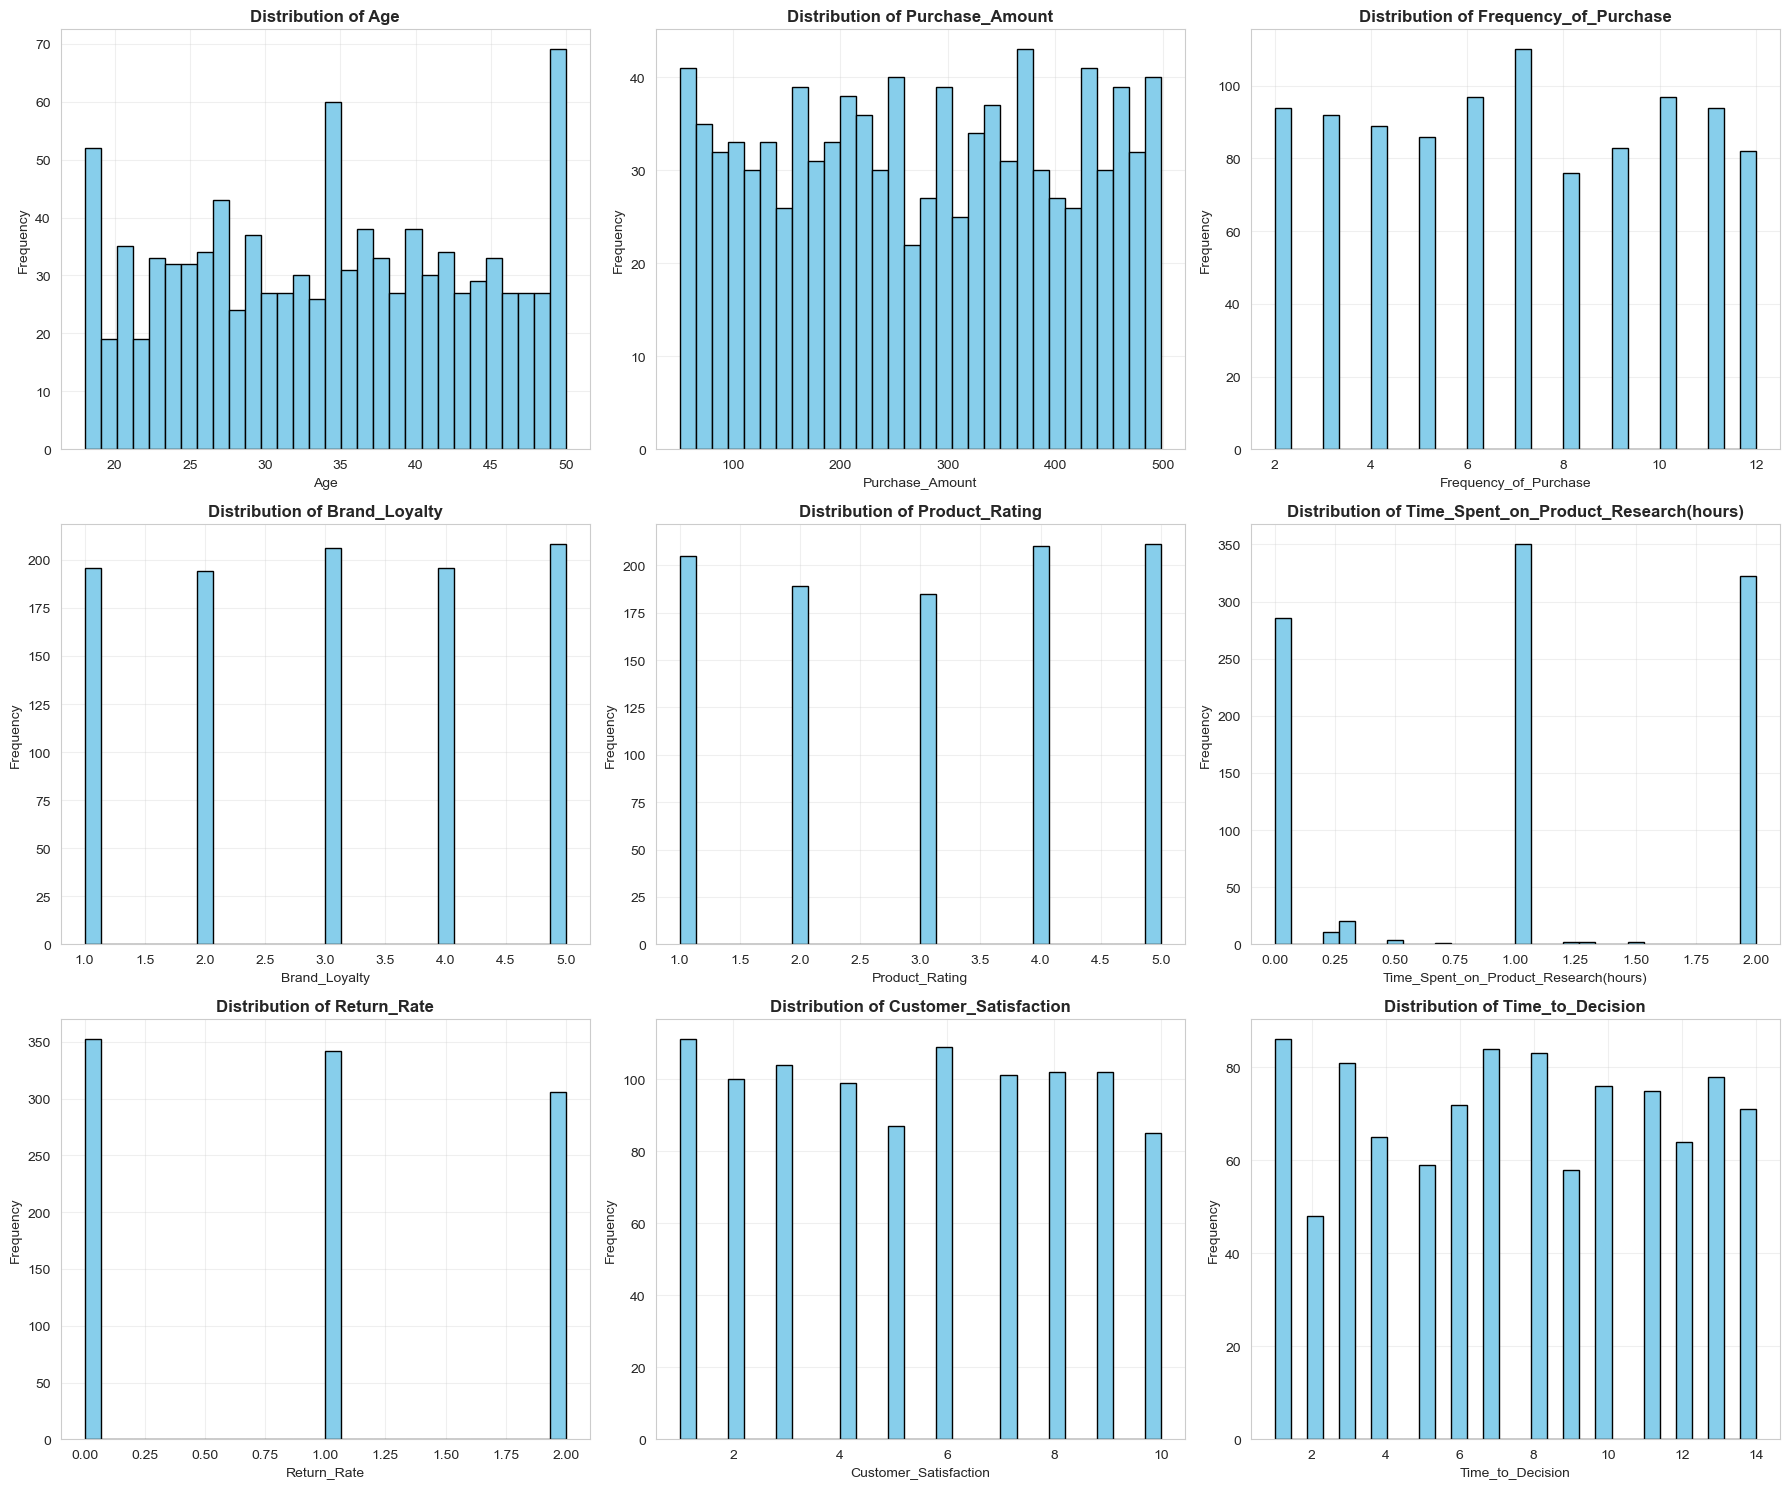

In [3]:
# Data Visualization 

# 1. Distribution of Numerical Features
if len(numerical_cols) > 0:
    print("\n1. Distribution Plots for Numerical Features")
    print("-" * 80)
    
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            cleaned_df[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='skyblue')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


2. Correlation Heatmap
--------------------------------------------------------------------------------


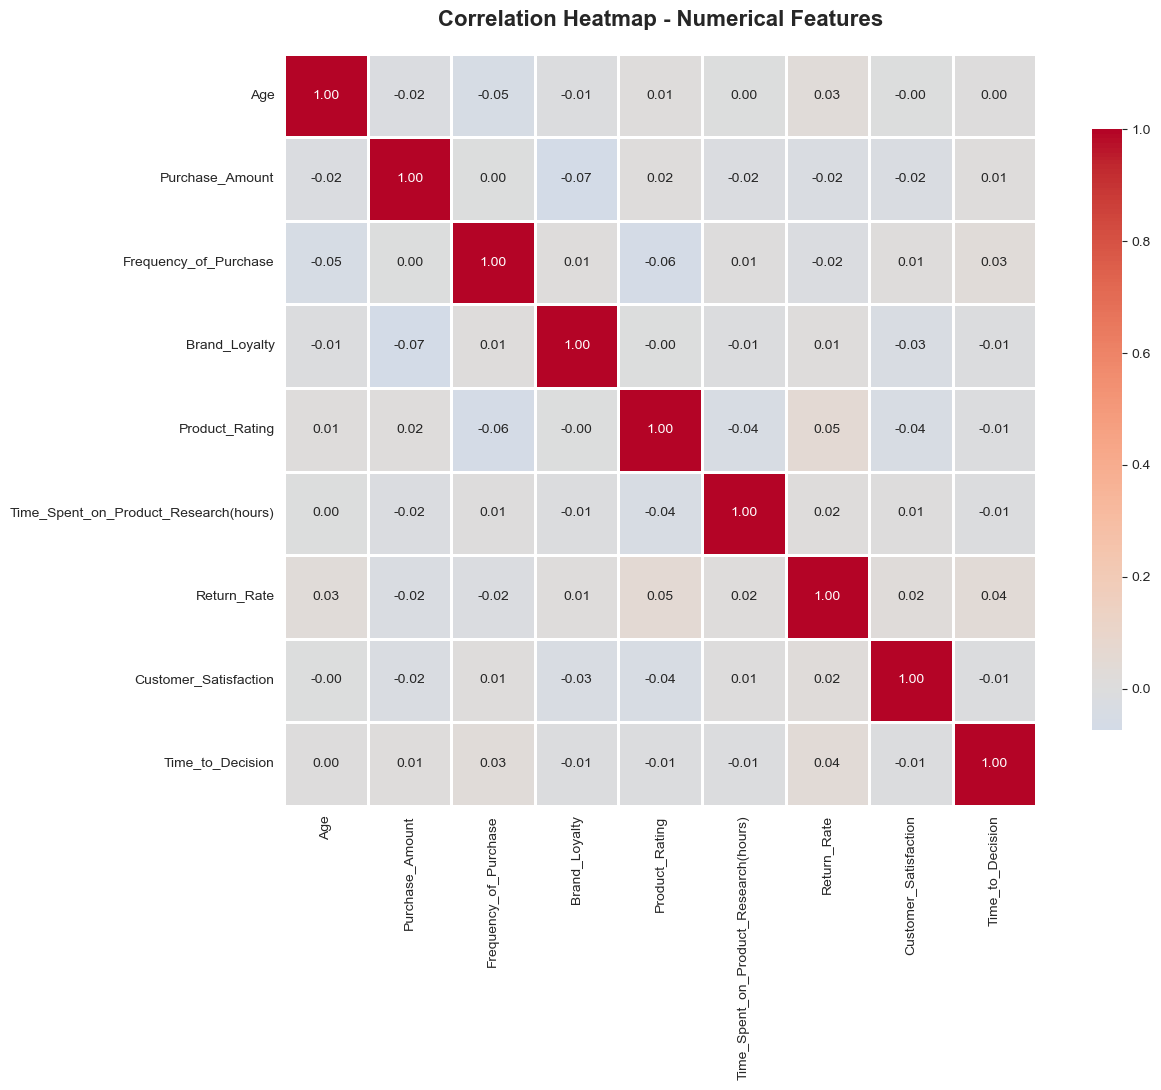

In [4]:
# 2. Correlation Heatmap
if len(numerical_cols) > 1:
    print("\n2. Correlation Heatmap")
    print("-" * 80)
    
    plt.figure(figsize=(14, 11))
    correlation_matrix = cleaned_df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


3. Box Plots - Outlier Detection
--------------------------------------------------------------------------------


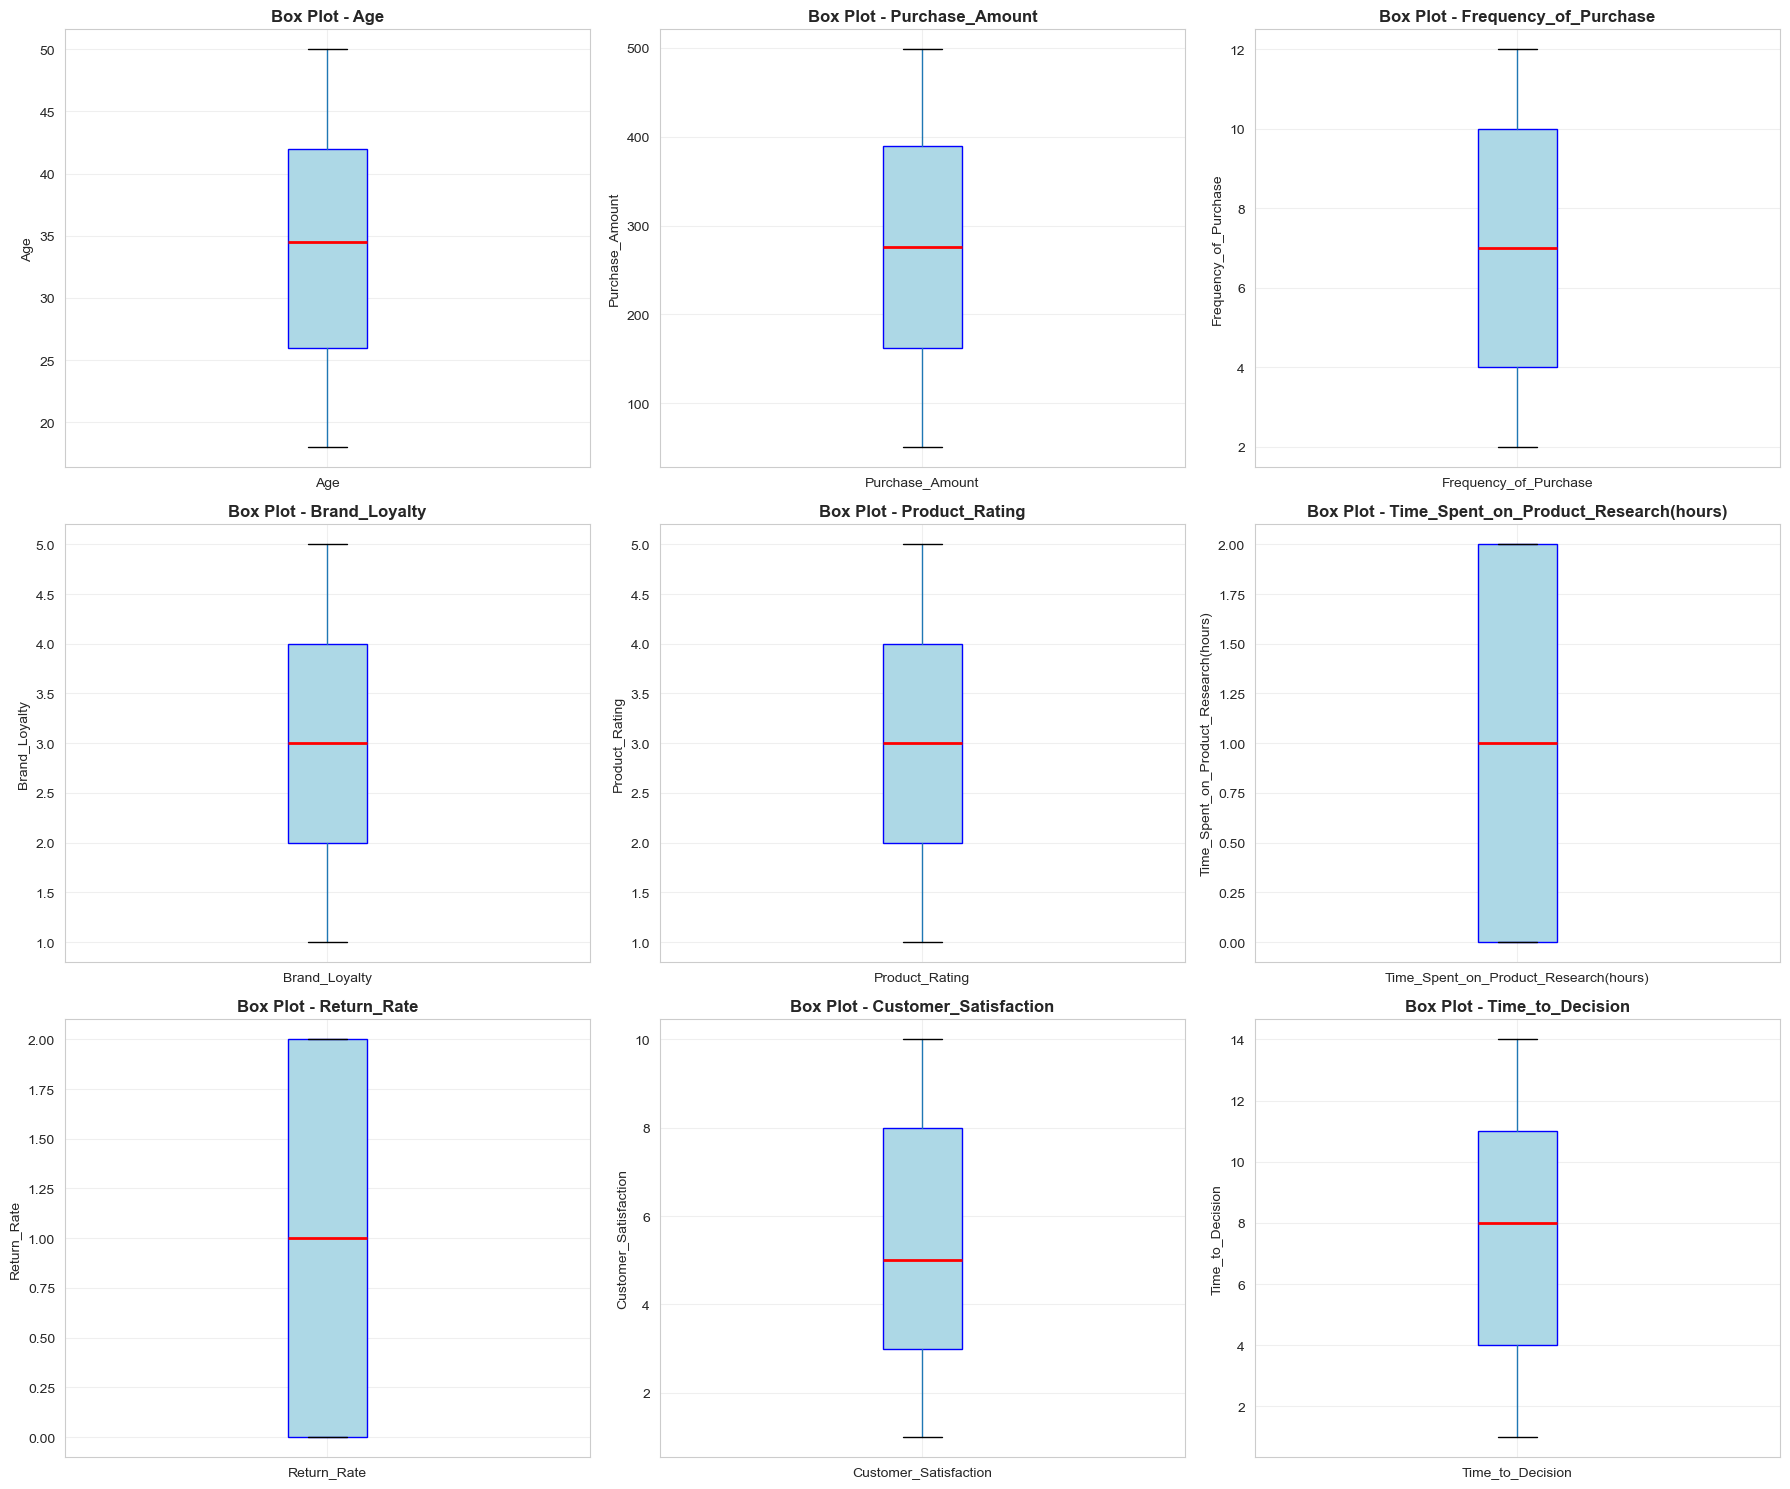

In [5]:
# 3. Box Plots for Outlier Detection
if len(numerical_cols) > 0:
    print("\n3. Box Plots - Outlier Detection")
    print("-" * 80)
    
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            cleaned_df.boxplot(column=col, ax=axes[idx], patch_artist=True,
                             boxprops=dict(facecolor='lightblue', color='blue'),
                             medianprops=dict(color='red', linewidth=2))
            axes[idx].set_title(f'Box Plot - {col}', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel(col)
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


4. Categorical Feature Analysis
--------------------------------------------------------------------------------


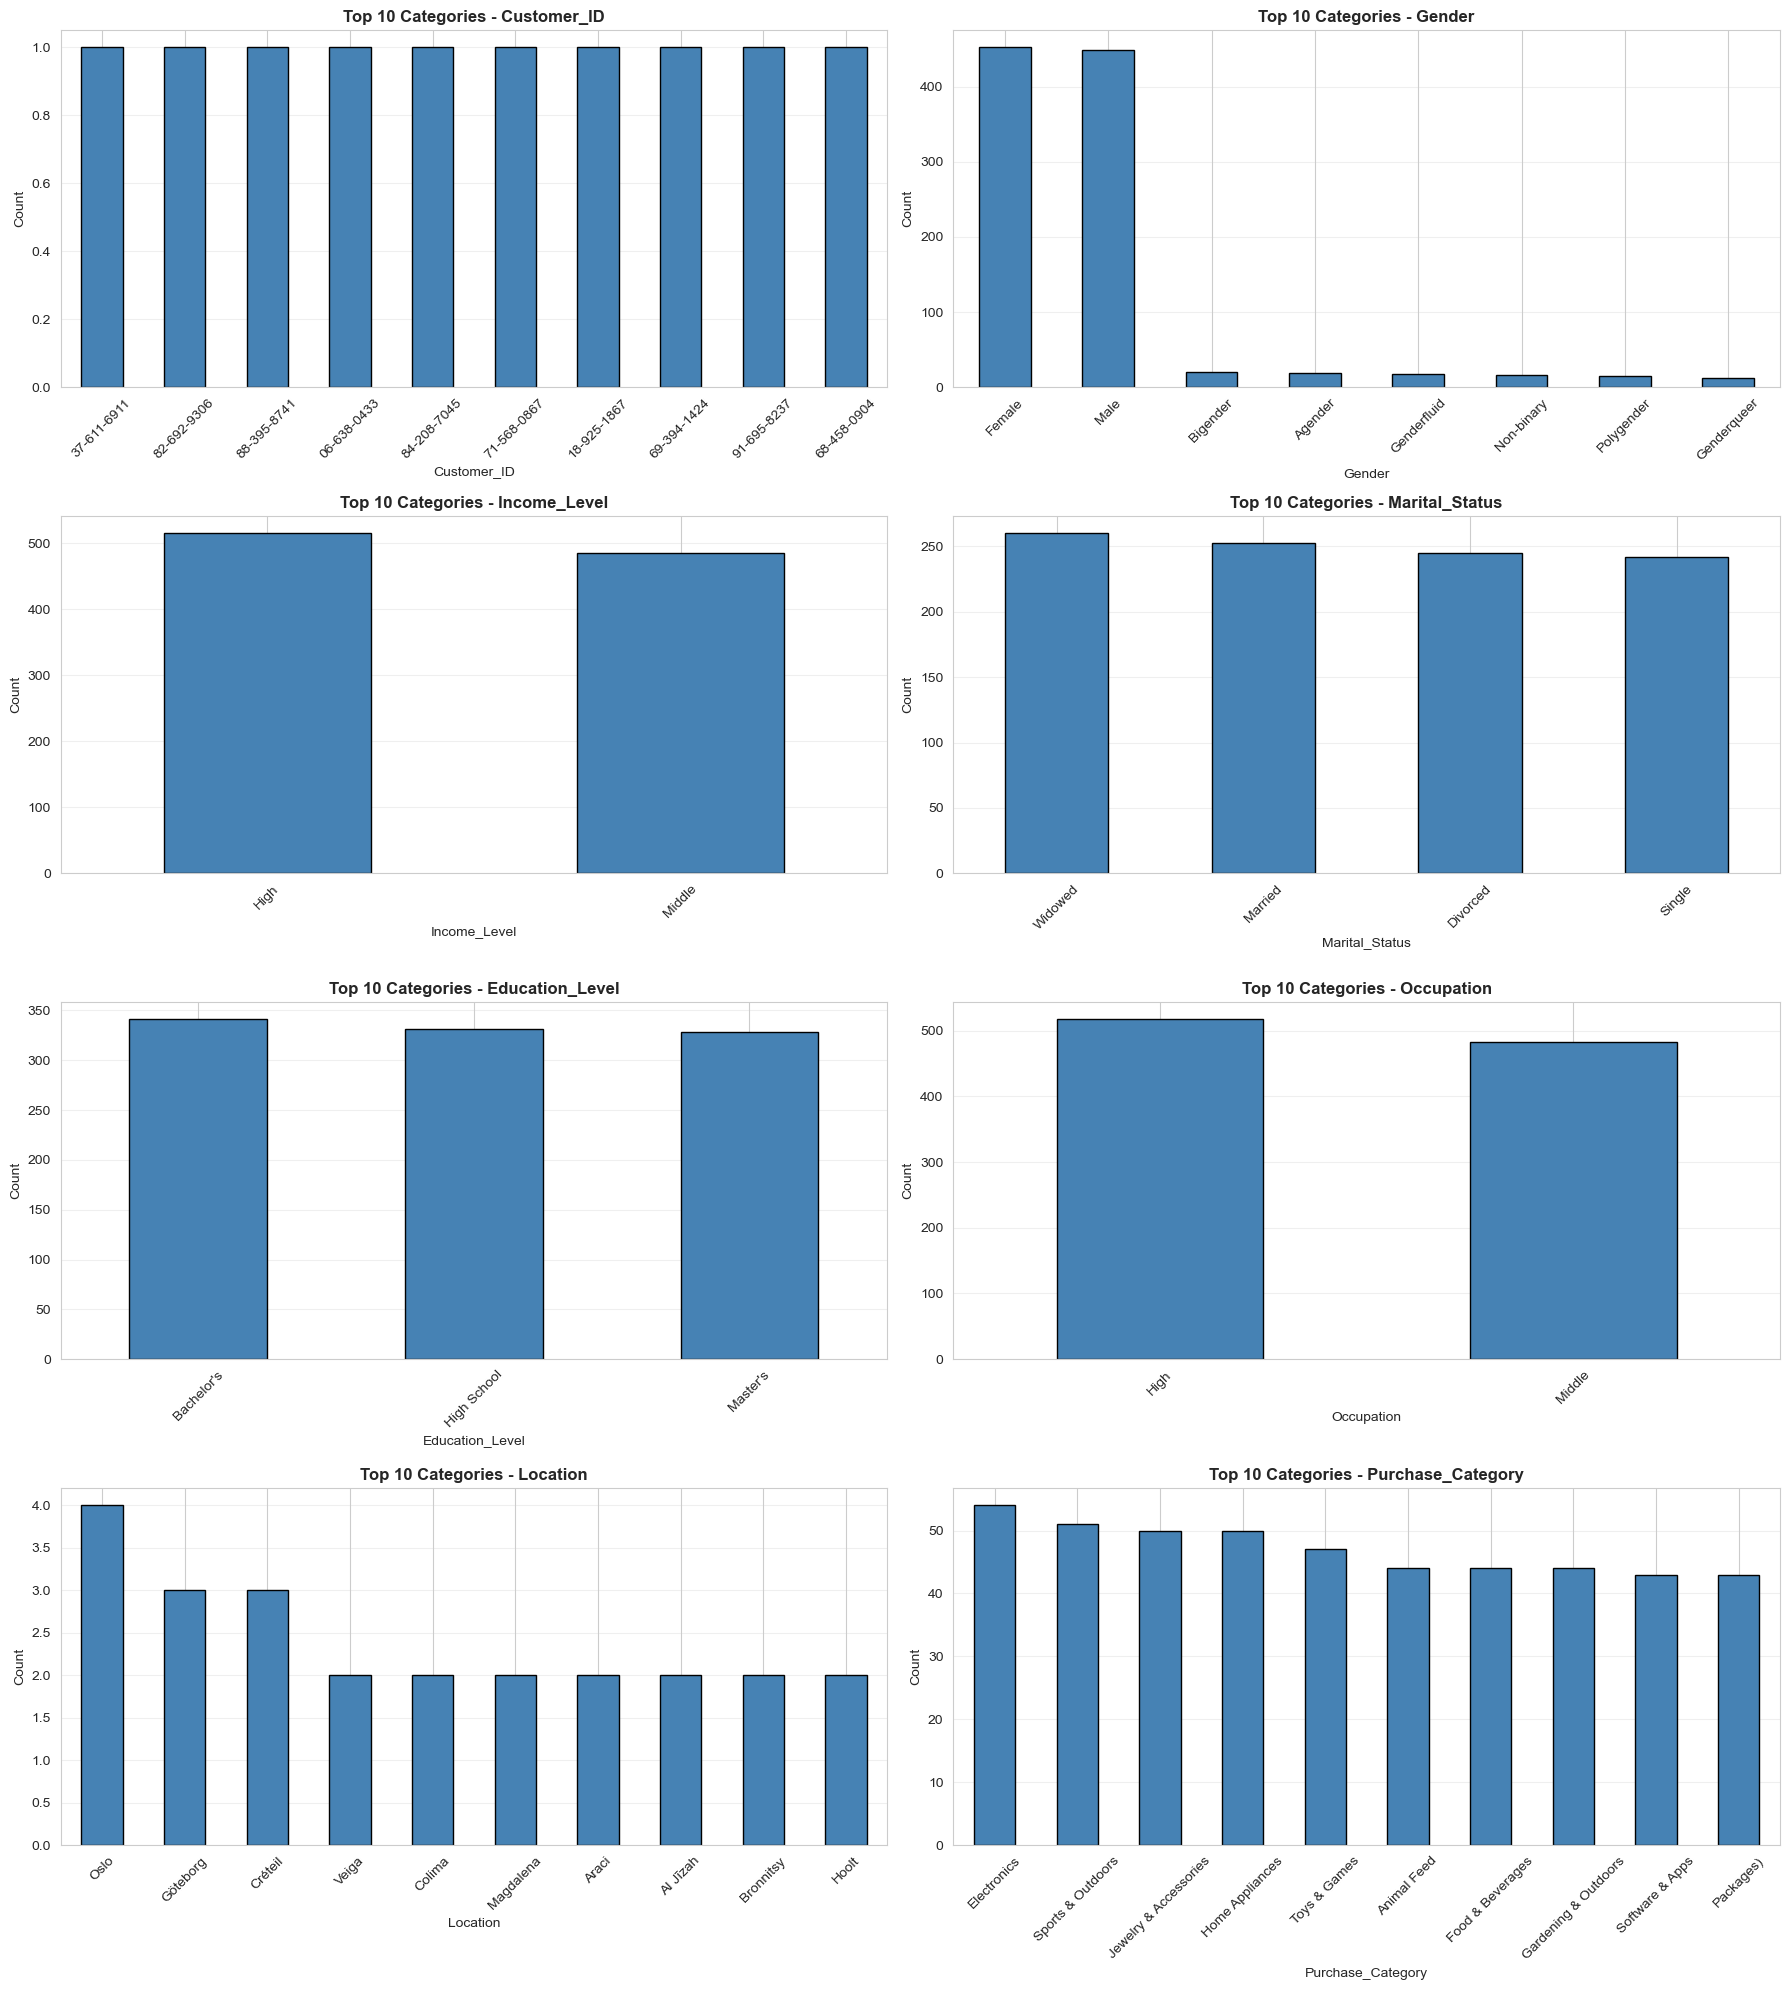

In [6]:
# 4. Categorical Feature Analysis
if len(categorical_cols) > 0:
    print("\n4. Categorical Feature Analysis")
    print("-" * 80)
    
    # Limit to top categorical columns for better visualization
    cols_to_plot = categorical_cols[:min(8, len(categorical_cols))]
    
    n_cols = min(2, len(cols_to_plot))
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(cols_to_plot):
        if idx < len(axes):
            value_counts = cleaned_df[col].value_counts().head(10)
            value_counts.plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
            axes[idx].set_title(f'Top 10 Categories - {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Count')
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(cols_to_plot), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


5. Purchase Amount Analysis
--------------------------------------------------------------------------------


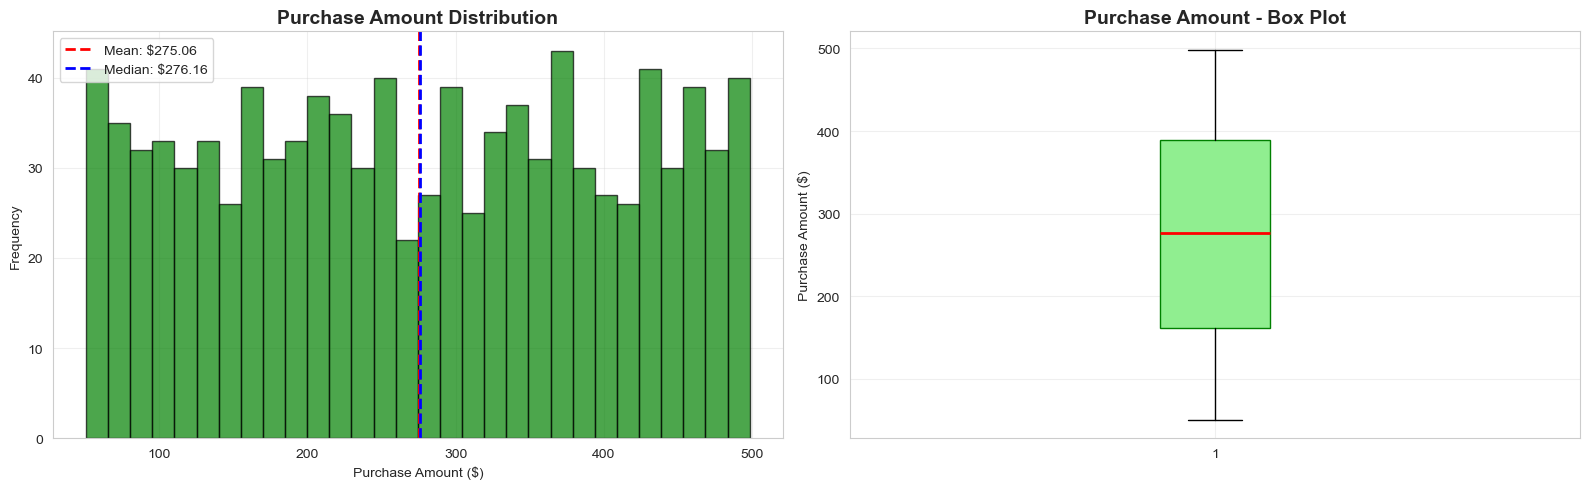


Purchase Amount Statistics:
  - Mean: $275.06
  - Median: $276.16
  - Min: $50.71
  - Max: $498.33
  - Std Dev: $131.53


In [7]:
# 5. Purchase Amount Analysis (if available)
if 'Purchase_Amount' in cleaned_df.columns:
    print("\n5. Purchase Amount Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Histogram
    axes[0].hist(cleaned_df['Purchase_Amount'], bins=30, color='green', edgecolor='black', alpha=0.7)
    axes[0].set_title('Purchase Amount Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Purchase Amount ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(cleaned_df['Purchase_Amount'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: ${cleaned_df["Purchase_Amount"].mean():.2f}')
    axes[0].axvline(cleaned_df['Purchase_Amount'].median(), color='blue', linestyle='--', 
                    linewidth=2, label=f'Median: ${cleaned_df["Purchase_Amount"].median():.2f}')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(cleaned_df['Purchase_Amount'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', color='green'),
                   medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Purchase Amount - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Purchase Amount ($)')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Purchase Amount Statistics
    print("\nPurchase Amount Statistics:")
    print(f"  - Mean: ${cleaned_df['Purchase_Amount'].mean():.2f}")
    print(f"  - Median: ${cleaned_df['Purchase_Amount'].median():.2f}")
    print(f"  - Min: ${cleaned_df['Purchase_Amount'].min():.2f}")
    print(f"  - Max: ${cleaned_df['Purchase_Amount'].max():.2f}")
    print(f"  - Std Dev: ${cleaned_df['Purchase_Amount'].std():.2f}")


6. Customer Satisfaction Analysis
--------------------------------------------------------------------------------


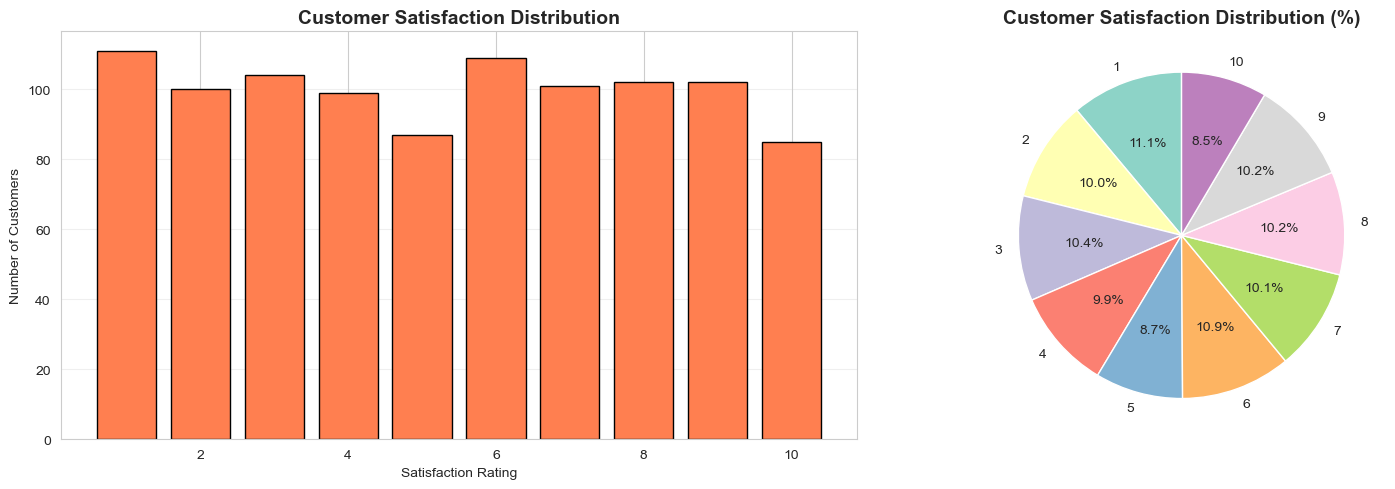

In [8]:
# 6. Customer Satisfaction Analysis
if 'Customer_Satisfaction' in cleaned_df.columns:
    print("\n6. Customer Satisfaction Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Bar plot
    satisfaction_counts = cleaned_df['Customer_Satisfaction'].value_counts().sort_index()
    axes[0].bar(satisfaction_counts.index, satisfaction_counts.values, color='coral', edgecolor='black')
    axes[0].set_title('Customer Satisfaction Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Satisfaction Rating')
    axes[0].set_ylabel('Number of Customers')
    axes[0].grid(alpha=0.3, axis='y')
    
    # Pie chart
    axes[1].pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%',
               startangle=90, colors=plt.cm.Set3.colors)
    axes[1].set_title('Customer Satisfaction Distribution (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()